# Static scale: scaling relationships in data

In this chapter we build on the concept of orders of magnitude we learnt and observe so-called scaling relationships between different variables that concern us in ecological economics. For example, we have a more detailed look now on the relationship between GDP per capita and energy consumption per capita across countries. We have a look at the relationship between these two variables at one point in time - therefore we call this "static scale" or "static scaling relationships". 

Here is an overview of you will learn in this chapter. 

You will learn how to:
- How to read interpret log-log plots
- understand the basics of a simple regression analysis also using log-log data
- Learn about power-laws and the concept of elasticity



## Power laws and log–log plots

```{math}
y \approx c x^{\alpha}
```

On a log–log plot, this becomes a line:

```{math}
\log_{10}(y) \approx \log_{10}(c) + \alpha\,\log_{10}(x)
```


In [1]:
alpha = 0.6
print("If x doubles, y multiplies by:", 2**alpha)
print("If x increases 10x, y multiplies by:", 10**alpha)


If x doubles, y multiplies by: 1.515716566510398
If x increases 10x, y multiplies by: 3.9810717055349722


## Demo dataset and log–log fits

We use a small demo dataset (plausible ballpark values) to practice log–log plots.


In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_demo_country_data():
    rows = [
        ("United States", 65000, 300, 333),
        ("Canada",        52000, 280,  40),
        ("Germany",       55000, 150,  84),
        ("France",        50000, 140,  68),
        ("United Kingdom",50000, 120,  67),
        ("Switzerland",   72000, 120,   9),
        ("Norway",        70000, 350,   5.5),
        ("China",         18000, 110, 1410),
        ("India",          8000,  30, 1420),
        ("Brazil",        16000,  80,  214),
        ("South Africa",  14000,  90,   60),
        ("Nigeria",        6000,  10,  223),
        ("Japan",         43000, 150,  124),
        ("Indonesia",     12000,  50,  277),
        ("Australia",     55000, 250,   26),
    ]
    df = pd.DataFrame(rows, columns=["country", "gdp_pc", "energy_pc_GJ", "pop_m"])
    df["pop"] = df["pop_m"] * 1e6
    df["gdp_total"] = df["gdp_pc"] * df["pop"]
    return df

def fit_powerlaw_log10(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    if np.any(x <= 0) or np.any(y <= 0):
        raise ValueError("fit_powerlaw_log10 requires all x>0 and y>0.")
    lx = np.log10(x)
    ly = np.log10(y)
    alpha, log10_c = np.polyfit(lx, ly, 1)
    c = 10**log10_c
    return alpha, c

df = load_demo_country_data()
df.head()


,country,gdp_pc,energy_pc_GJ,pop_m,pop,gdp_total
0,United States,65000,300,333.0,333000000.0,2.164500e+13
1,Canada,52000,280,40.0,40000000.0,2.080000e+12
2,Germany,55000,150,84.0,84000000.0,4.620000e+12
3,France,50000,140,68.0,68000000.0,3.400000e+12
4,United Kingdom,50000,120,67.0,67000000.0,3.350000e+12


## Plot 1: Energy per capita vs GDP per capita (log–log)

Estimated alpha ≈ 0.98
Estimated c     ≈ 0.0046


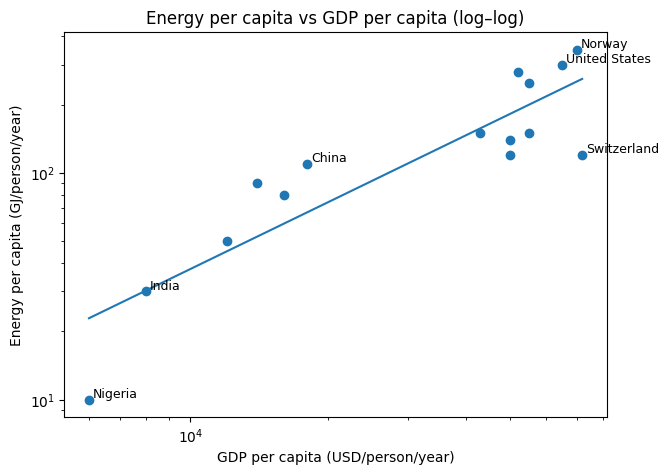

In [3]:
x = df["gdp_pc"].to_numpy()
y = df["energy_pc_GJ"].to_numpy()

alpha, c = fit_powerlaw_log10(x, y)
print(f"Estimated alpha ≈ {alpha:.2f}")
print(f"Estimated c     ≈ {c:.2g}")

plt.figure(figsize=(7,5))
plt.scatter(x, y)
plt.xscale("log"); plt.yscale("log")
plt.xlabel("GDP per capita (USD/person/year)")
plt.ylabel("Energy per capita (GJ/person/year)")
plt.title("Energy per capita vs GDP per capita (log–log)")

xx = np.logspace(np.log10(x.min()), np.log10(x.max()), 200)
plt.plot(xx, c * xx**alpha)

for name in ["United States", "Nigeria", "India", "China", "Norway", "Switzerland"]:
    r = df[df["country"] == name].iloc[0]
    plt.text(r["gdp_pc"]*1.02, r["energy_pc_GJ"]*1.02, name, fontsize=9)

plt.show()


## Plot 2: Population vs total GDP (log–log)

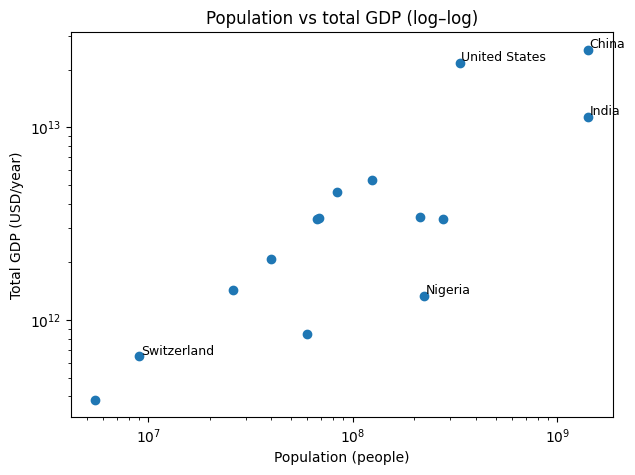

In [4]:
plt.figure(figsize=(7,5))
plt.scatter(df["pop"], df["gdp_total"])
plt.xscale("log"); plt.yscale("log")
plt.xlabel("Population (people)")
plt.ylabel("Total GDP (USD/year)")
plt.title("Population vs total GDP (log–log)")

for name in ["United States", "Nigeria", "India", "China", "Switzerland"]:
    r = df[df["country"] == name].iloc[0]
    plt.text(r["pop"]*1.02, r["gdp_total"]*1.02, name, fontsize=9)

plt.show()
